# Data analyst

## Load libraries

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

## Load data

In [4]:
ROOT_PATH = os.pardir

RAW_DATA_PATH = ROOT_PATH + '\\data\\raw\\'

PROC_DATA_PATH = ROOT_PATH + '\\data\\proc\\'

In [5]:
signals = pd.read_excel(PROC_DATA_PATH + 'measure1_wifi_smartphone.xlsx', index_col=0)
signals

,place_id,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,...,WAP123,WAP124,WAP125,WAP126,WAP127,MagneticFieldX,MagneticFieldY,MagneticFieldZ,x,y
3,2,-100,-100,-100,-100,-100,-100,-100,-100,-100,...,-100,-100,-100,-100,-100,-15.4,-0.2,-33.3,1.2,0.6
6,2,-100,-100,-100,-100,-100,-100,-100,-100,-100,...,-100,-100,-100,-100,-100,-15.4,-0.8,-33.3,1.2,0.6
7,2,-100,-100,-100,-100,-100,-100,-100,-100,-100,...,-100,-100,-100,-100,-100,-15.4,-1.2,-33.3,1.2,0.6
9,2,-100,-100,-100,-100,-100,-100,-100,-100,-100,...,-100,-100,-100,-100,-100,-15.4,-1.2,-33.7,1.2,0.6
14,2,-100,-100,-100,-100,-100,-100,-100,-100,-100,...,-100,-100,-100,-100,-100,-15.0,-1.2,-33.7,1.2,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11444,324,-69,-69,-50,-49,-100,-100,-75,-76,-100,...,-100,-78,-77,-100,-100,14.1,-37.2,-19.6,32.4,34.2
11446,324,-69,-69,-50,-49,-100,-100,-75,-76,-100,...,-100,-78,-77,-100,-100,14.1,-36.8,-19.6,32.4,34.2
11447,324,-69,-69,-50,-49,-100,-100,-75,-76,-100,...,-100,-78,-77,-100,-100,14.1,-36.8,-20.0,32.4,34.2
11448,324,-69,-69,-50,-49,-100,-100,-75,-76,-100,...,-100,-78,-77,-100,-100,14.5,-36.8,-20.0,32.4,34.2


## Split labels and features

In [6]:
# X = m1_wifi_df.iloc[:,:-2]
# y = m1_wifi_df.iloc[:,-2:]

X = signals.iloc[:,1:-2]
y = signals.iloc[:,-2:]

### Standarize

In [7]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler().fit(X)
X = pd.DataFrame(std.transform(X), columns=X.columns)

## Split train test

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle           

X, y = shuffle(X, y, random_state=44)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=44)

## Build the model

### Linear Regression for Multioutput Regression

In [9]:
from sklearn.linear_model import LinearRegression

# define model
model = LinearRegression()
# define the evaluation procedure
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=44)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force the scores to be positive
n_scores = np.absolute(n_scores)
# summarize performance
print('MAE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

MAE: 1.247 (0.048)


### k-Nearest Neighbors for Multioutput Regression

In [10]:
from sklearn.neighbors import KNeighborsRegressor

# define model
model = KNeighborsRegressor()
# define the evaluation procedure
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=44)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force the scores to be positive
n_scores = np.absolute(n_scores)
# summarize performance
print('MAE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

MAE: 0.017 (0.008)


### Decision Tree

In [11]:
from sklearn.tree import DecisionTreeRegressor

# define model
model = DecisionTreeRegressor()
# define the evaluation procedure
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=44)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force the scores to be positive
n_scores = np.absolute(n_scores)
# summarize performance
print('MAE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

MAE: 0.004 (0.006)


### Direct Multioutput Regression

In [12]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import LinearSVR

# define base model
model = LinearSVR()
# define the direct multioutput wrapper model
wrapper = MultiOutputRegressor(model)
# define the evaluation procedure
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=44)
# evaluate the model and collect the scores
n_scores = cross_val_score(wrapper, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force the scores to be positive
n_scores = np.absolute(n_scores)
# summarize performance
print('MAE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

MAE: 1.028 (0.046)


### Chained Multioutput Regression

In [13]:
from sklearn.multioutput import RegressorChain

# define base model
model = LinearSVR()
# define the direct multioutput wrapper model
wrapper = RegressorChain(model)
# define the evaluation procedure
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=44)
# evaluate the model and collect the scores
n_scores = cross_val_score(wrapper, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force the scores to be positive
n_scores = np.absolute(n_scores)
# summarize performance
print('MAE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

MAE: 1.108 (0.051)


### Deep learning

In [14]:
import keras
from keras.models import Sequential
from keras.layers import Dense

# define the model
model = Sequential()
model.add(Dense(20, input_dim=130, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(2))
model.compile(loss='mse',
              optimizer='adam',
              metrics = ['mae','mse'])

In [15]:
history = model.fit(
    X_train,
    y_train,
    batch_size = 10,
    epochs = 100,
    validation_split = 0.2,
    callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)]
)

Epoch 1/100
325/325 [==============================] - 2s 2ms/step - loss: 180.1431 - mae: 9.6281 - mse: 180.1431 - val_loss: 13.6696 - val_mae: 2.4136 - val_mse: 13.6696
Epoch 2/100
325/325 [==============================] - 0s 1ms/step - loss: 12.3593 - mae: 2.0912 - mse: 12.3593 - val_loss: 7.6079 - val_mae: 1.6071 - val_mse: 7.6079
Epoch 3/100
325/325 [==============================] - 1s 2ms/step - loss: 9.0315 - mae: 1.6599 - mse: 9.0315 - val_loss: 5.9955 - val_mae: 1.3917 - val_mse: 5.9955
Epoch 4/100
325/325 [==============================] - 0s 1ms/step - loss: 7.6150 - mae: 1.4847 - mse: 7.6150 - val_loss: 5.1800 - val_mae: 1.2438 - val_mse: 5.1800
Epoch 5/100
325/325 [==============================] - 1s 2ms/step - loss: 6.7787 - mae: 1.3631 - mse: 6.7787 - val_loss: 4.6765 - val_mae: 1.1667 - val_mse: 4.6765
Epoch 6/100
325/325 [==============================] - 0s 1ms/step - loss: 6.2543 - mae: 1.2781 - mse: 6.2543 - val_loss: 4.2580 - val_mae: 1.1080 - val_mse: 4.2580
Ep

In [16]:
df_hist = pd.DataFrame(history.history)
df_hist['epoch'] = history.epoch
df_hist

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
0,180.143112,9.628095,180.143112,13.669559,2.413592,13.669559,0
1,12.359330,2.091240,12.359330,7.607944,1.607114,7.607945,1
2,9.031525,1.659949,9.031525,5.995463,1.391671,5.995463,2
3,7.615009,1.484725,7.615009,5.179979,1.243825,5.179979,3
4,6.778715,1.363055,6.778715,4.676468,1.166668,4.676468,4
...,...,...,...,...,...,...,...
68,1.382760,0.501611,1.382760,1.001272,0.451669,1.001272,68
69,1.329074,0.490625,1.329074,1.056892,0.483616,1.056892,69
70,1.368080,0.478993,1.368080,1.038592,0.489439,1.038592,70
71,1.328975,0.479791,1.328975,1.124127,0.455732,1.124127,71


In [17]:
def plot_history(history):
    df_hist = pd.DataFrame(history.history)
    df_hist['epoch'] = history.epoch
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('MAE')
    plt.plot(df_hist['epoch'], df_hist['mae'], label=['Train Error'] )
    plt.plot(df_hist['epoch'], df_hist['val_mae'], label=['Val Error'] )
    plt.legend()
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.plot(df_hist['epoch'], df_hist['mse'], label=['Train Error'] )
    plt.plot(df_hist['epoch'], df_hist['val_mse'], label=['Val Error'] )
    plt.ylim([0,20])
    plt.legend()

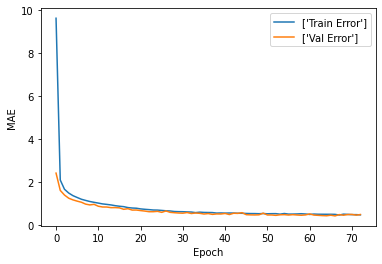

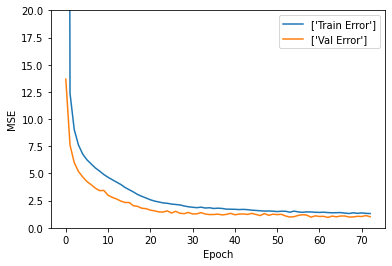

In [18]:
plot_history(history)

## Tune hyperparameters

In [19]:
from sklearn.pipeline import Pipeline
# from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV

In [22]:
neighbors = Pipeline([
                ("neighbors",KNeighborsRegressor())
               ])


decisionTree = Pipeline([
                    ("decisionTree",DecisionTreeRegressor())
                   ])

# KNN
grid_neighbors = {"neighbors__n_neighbors": [3,5,7,9,11],       # Pares acepta sklearn, pero se suele poner impares, por los empates
                  "neighbors__weights": ["uniform","distance"]  # Ponderar o no las clasificaciones en 
                                                     # función de la inversa de la distancia a cada vecino
                  }

# ARBOL DE DECISION
grid_decisionTree = {"decisionTree__max_depth":list(range(1,10)) # Profundidades del árbol. Cuanto más profundo, mas posibilidades de overfitting,
                                            # pero  mas preciso en entrenamiento.
              }




In [23]:
# Almaceno en una lista de tuplas los modelos (nombre que le pongo, el modelo, hiperparametros)
models = [('KNeighborsRegressor', neighbors, grid_neighbors),
         ('DecisionTreeRegressor', decisionTree, grid_decisionTree),
         ]

# Declaro en un diccionario los pipelines e hiperparametros
models_gridsearch = {}

for m in models:
    models_gridsearch[m[0]] = GridSearchCV(m[1],
                                          m[2],
                                          cv=5,
                                          scoring="neg_mean_squared_error",
                                          verbose=1,
                                          n_jobs=-1)
    
    models_gridsearch[m[0]].fit(X_train, y_train)         

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [24]:
best_grids = [(i, j.best_score_) for i, j in models_gridsearch.items()]

best_grids = pd.DataFrame(best_grids, columns=["Grid", "Best score"]).sort_values(by="Best score", ascending=False)
best_grids

,Grid,Best score
0,KNeighborsRegressor,-0.001288
1,DecisionTreeRegressor,-0.305582


In [25]:
# El mejor ha sido KNN
models_gridsearch['KNeighborsRegressor'].best_estimator_

Pipeline(steps=[('neighbors',
                 KNeighborsRegressor(n_neighbors=3, weights='distance'))])

## Test the model

In [26]:
# define model
model = KNeighborsRegressor(n_neighbors=3, weights='distance')
# model = DecisionTreeRegressor()
model.fit(X_train, y_train)
print(model.predict(X_test))

[[20.4  4.8]
 [15.6  6. ]
 [31.2 29.4]
 ...
 [ 6.6  6. ]
 [27.6  6. ]
 [36.  17.4]]


c:\src\theBridge\course-env\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [27]:
i = 150
# test = X_test.iloc[i:i+1, :]
print(f'Real point {y_test.iloc[i:i+1, :]}')
print(f'Point predicted {model.predict(X_test.iloc[i:i+1:, :])}')

Real point          x    y
6520  19.8  7.8
Point predicted [[19.8  7.8]]


c:\src\theBridge\course-env\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [35]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

predictions = model.predict(X_test)
print("MSE:  %.7f " % mean_squared_error(y_test, predictions))
print("RMSE: %.5f " % np.sqrt(mean_squared_error(y_test, predictions)))
print("MAE:  %.5f " % mean_absolute_error(y_test, predictions))

c:\src\theBridge\course-env\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"


MSE:  0.0000004 
RMSE: 0.00064 
MAE:  0.00002 
